In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [108]:
# Building path to data_files
curr_dir = os.getcwd()
main_dir = os.path.dirname(curr_dir)
data_files_dir = os.path.join(main_dir, 'data_files')
images_dir = os.path.join(main_dir, 'images')

In [3]:
train_file = os.path.join(data_files_dir, 'train_1.csv')

In [4]:
# Load csv into a DataFrame
train_df = pd.read_csv(train_file)

In [5]:
# Select on topic inside csv file
train_df[train_df["Page"].str.contains("learning")]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
12984,Machine_learning_en.wikipedia.org_desktop_all-...,2687.0,2265.0,1742.0,1090.0,1291.0,2528.0,2731.0,2474.0,2494.0,...,3290.0,2415.0,1618.0,1590.0,2165.0,2589.0,3036.0,2726.0,2426.0,1545.0


In [6]:
train_df.loc[12984]['Page']

'Machine_learning_en.wikipedia.org_desktop_all-agents'

In [7]:
train_df.loc[12984]

Page          Machine_learning_en.wikipedia.org_desktop_all-...
2015-07-01                                               2687.0
2015-07-02                                               2265.0
2015-07-03                                               1742.0
2015-07-04                                               1090.0
                                    ...                        
2016-12-27                                               2589.0
2016-12-28                                               3036.0
2016-12-29                                               2726.0
2016-12-30                                               2426.0
2016-12-31                                               1545.0
Name: 12984, Length: 551, dtype: object

In [8]:
train_df.set_index("Page", inplace=True)

In [9]:
# We'll use this machine learning page for our time series analysis
# Before that, we need to clean up this DataFrame so that the date is in datetime
# and that there isn't any missing data in the series
web_traffic_df = train_df.loc["Machine_learning_en.wikipedia.org_desktop_all-agents"]

In [10]:
web_traffic_df

2015-07-01    2687.0
2015-07-02    2265.0
2015-07-03    1742.0
2015-07-04    1090.0
2015-07-05    1291.0
               ...  
2016-12-27    2589.0
2016-12-28    3036.0
2016-12-29    2726.0
2016-12-30    2426.0
2016-12-31    1545.0
Name: Machine_learning_en.wikipedia.org_desktop_all-agents, Length: 550, dtype: float64

In [11]:
web_traffic_df = web_traffic_df.reset_index()

In [12]:
web_traffic_df

,index,Machine_learning_en.wikipedia.org_desktop_all-agents
0,2015-07-01,2687.0
1,2015-07-02,2265.0
2,2015-07-03,1742.0
3,2015-07-04,1090.0
4,2015-07-05,1291.0
...,...,...
545,2016-12-27,2589.0
546,2016-12-28,3036.0
547,2016-12-29,2726.0
548,2016-12-30,2426.0


In [13]:
column_names = {"index":"date", "Machine_learning_en.wikipedia.org_desktop_all-agents":"visits"}

In [14]:
web_traffic_df.rename(columns=column_names, inplace=True)

In [15]:
web_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    550 non-null    object 
 1   visits  550 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [16]:
web_traffic_df["date"] = pd.to_datetime(web_traffic_df["date"])

In [17]:
web_traffic_df

,date,visits
0,2015-07-01,2687.0
1,2015-07-02,2265.0
2,2015-07-03,1742.0
3,2015-07-04,1090.0
4,2015-07-05,1291.0
...,...,...
545,2016-12-27,2589.0
546,2016-12-28,3036.0
547,2016-12-29,2726.0
548,2016-12-30,2426.0


In [18]:
web_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    550 non-null    datetime64[ns]
 1   visits  550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [19]:
web_traffic_df.set_index("date", inplace=True)

In [20]:
web_traffic_df

,visits
date,
2015-07-01,2687.0
2015-07-02,2265.0
2015-07-03,1742.0
2015-07-04,1090.0
2015-07-05,1291.0
...,...
2016-12-27,2589.0
2016-12-28,3036.0
2016-12-29,2726.0


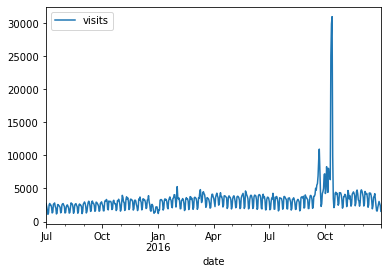

In [21]:
# Plot whole time series
web_traffic_df.plot()
plt.show()

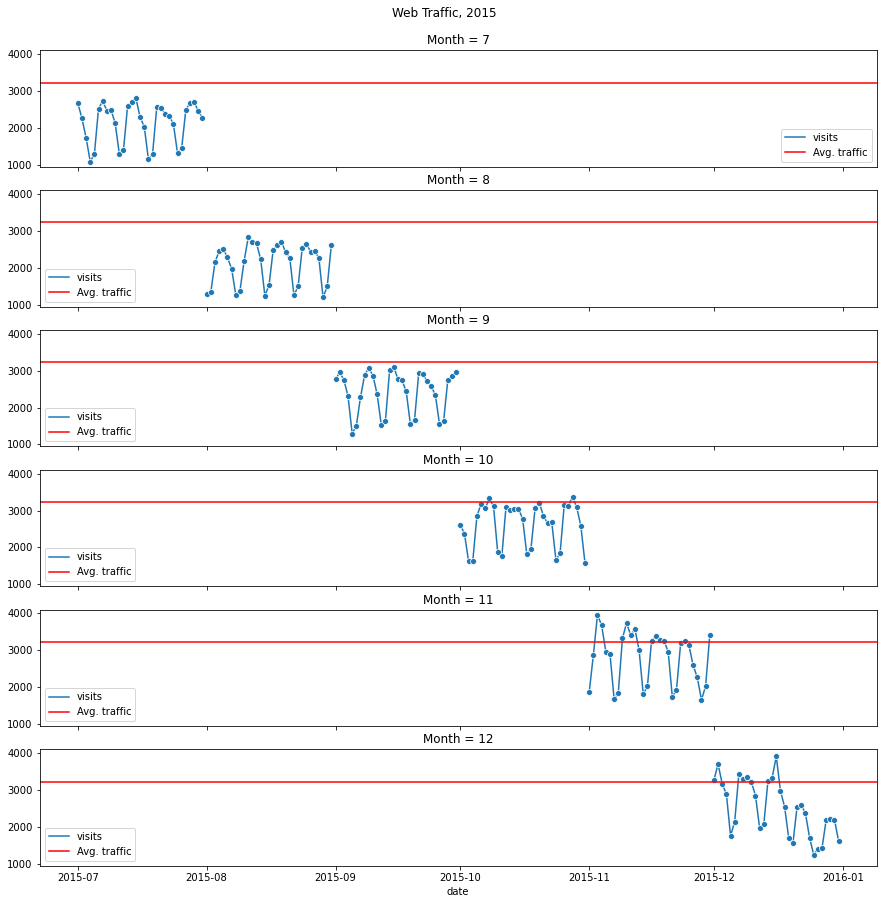

In [22]:
# Plot time series by month (2015)
fig, ax = plt.subplots(6, figsize=(15,15), sharex=True, sharey=True)
overall_average = web_traffic_df['visits'].mean()
for i, month in enumerate(list(range(7, 13))):
    sns.lineplot(data=web_traffic_df.loc[f"2015-{month}"], marker='o', ax=ax[i])
    ax[i].set_title(f"Month = {month}")
    ax[i].axhline(y=overall_average, color="red", linestyle="-",
                  label="Avg. traffic")
    ax[i].legend()
fig.suptitle("Web Traffic, 2015", y=0.92)
plt.show()

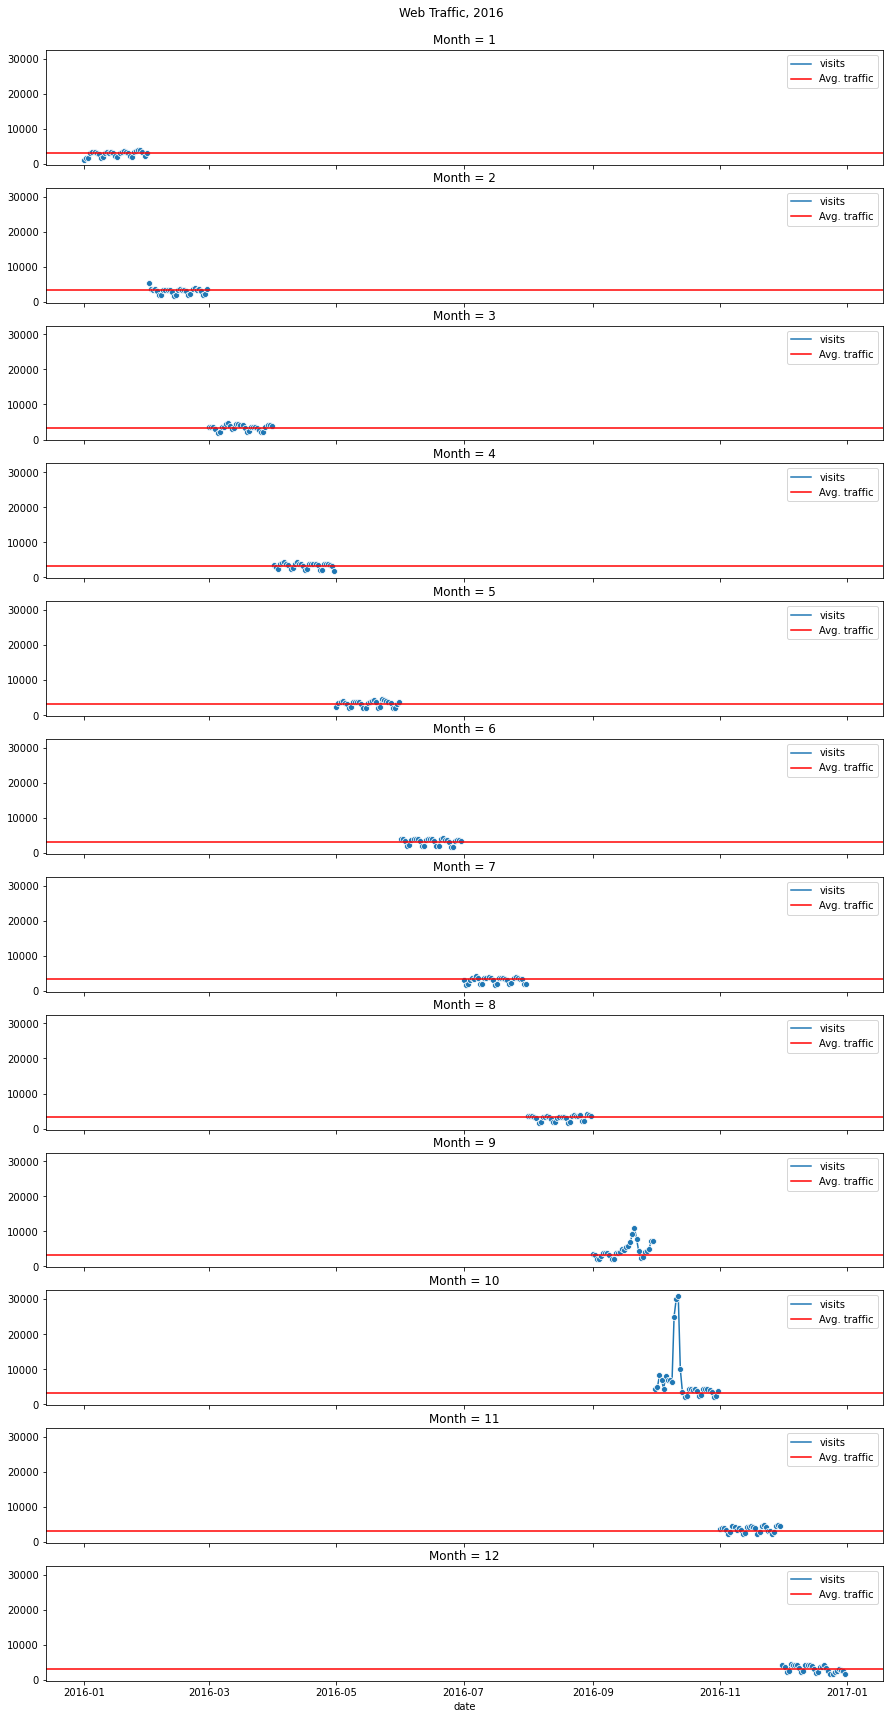

In [23]:
# Plot time series by month (2016)
fig, ax = plt.subplots(12, figsize=(15,30), sharex=True, sharey=True)
overall_average = web_traffic_df['visits'].mean()
for i, month in enumerate(list(range(1, 13))):
    sns.lineplot(data=web_traffic_df.loc[f"2016-{month}"], marker='o', ax=ax[i])
    ax[i].set_title(f"Month = {month}")
    ax[i].axhline(y=overall_average, color="red", linestyle="-",
                  label="Avg. traffic")
    ax[i].legend()
fig.suptitle("Web Traffic, 2016", y=0.90)
plt.show()

The outlier in October is skewing our overall average. But to get a clearer view of the cycling pattern, we'll set a limit to the y-axis to 3 times the standard deviation of the mean.

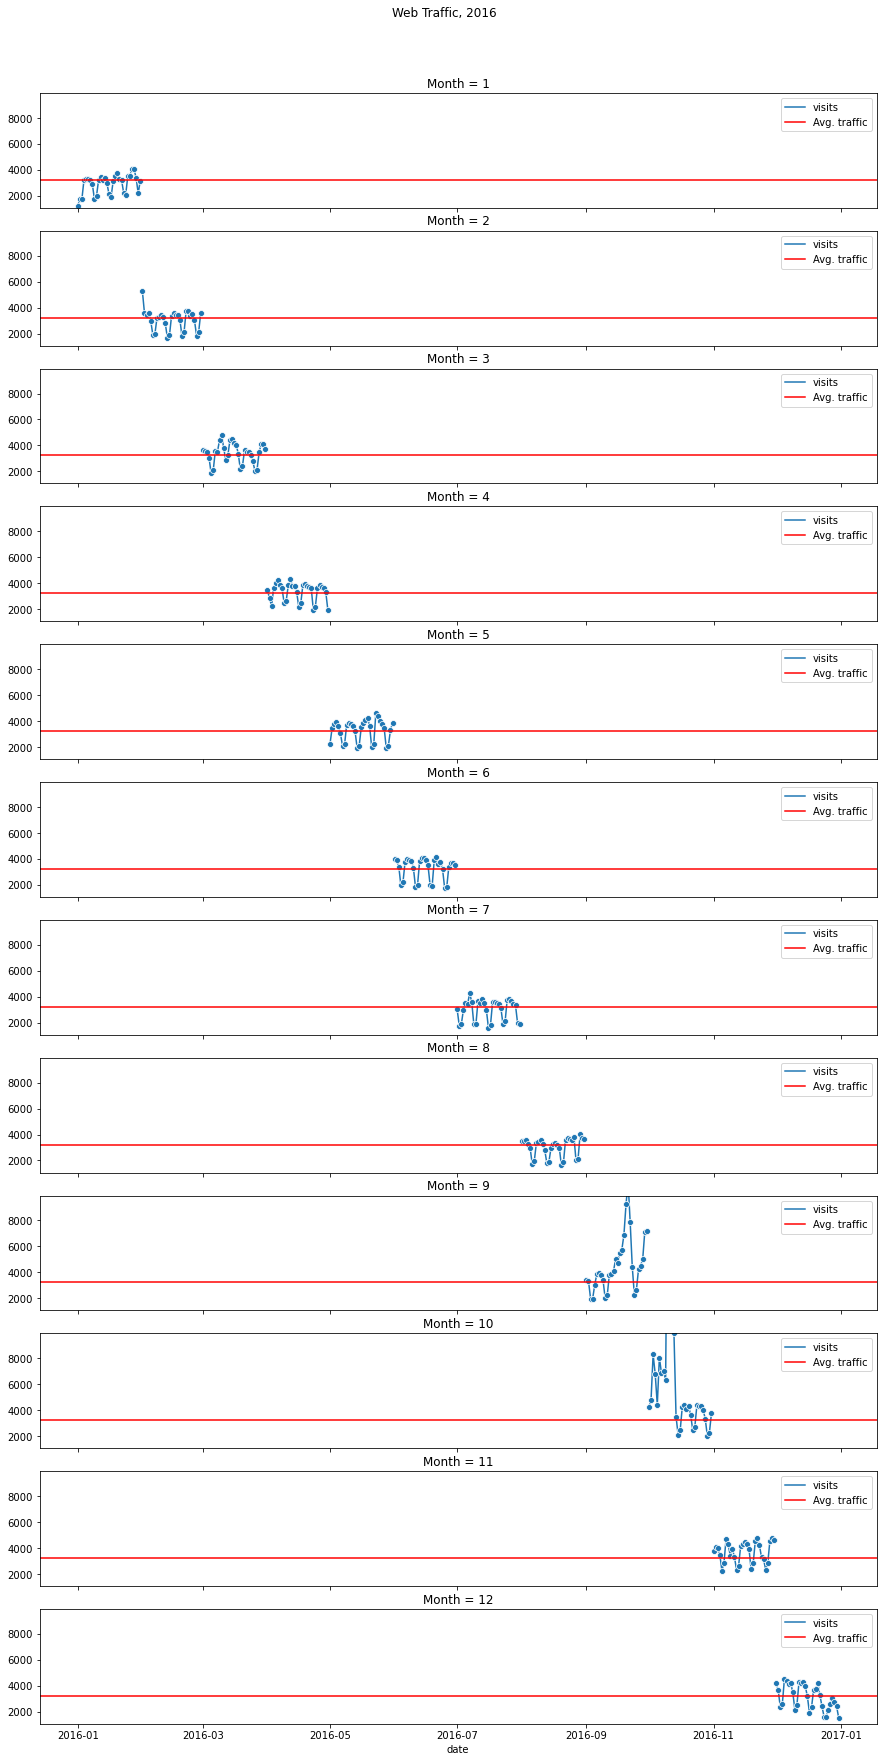

In [24]:
# Setting limit to y-axis to 3 times standard deviation of mean
fig, ax = plt.subplots(12, figsize=(15,30), sharex=True, sharey=True)
overall_average = web_traffic_df['visits'].mean()
standard_deviation = web_traffic_df['visits'].std()
for i, month in enumerate(list(range(1, 13))):
    sns.lineplot(data=web_traffic_df.loc[f"2016-{month}"], marker='o', ax=ax[i])
    ax[i].set_title(f"Month = {month}")
    ax[i].axhline(y=overall_average, color="red", linestyle="-",
                  label="Avg. traffic")
    ax[i].set_ylim([None, overall_average + (3 * standard_deviation)])
    ax[i].legend()
fig.suptitle("Web Traffic, 2016", y=0.92)
plt.show()

While most of the data hover around the average site traffic, it's clear that the traffic in 2015 is lower considering it mostly hovered below the average, whereas you're mostly touching or passing the average traffic in 2016.

We could confirm this using a boxplot.

In [25]:
web_traffic_df['year'] = web_traffic_df.index.year

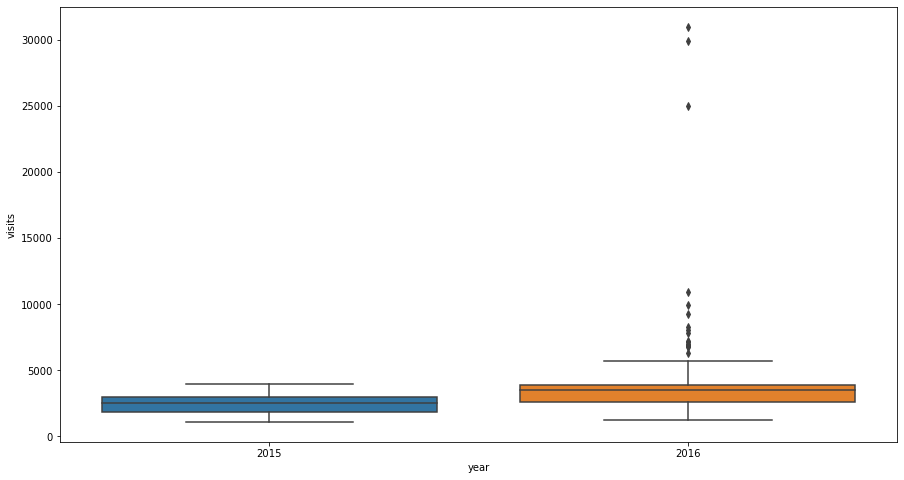

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.boxplot(data=web_traffic_df, x="year", y="visits", ax=ax)
plt.show()

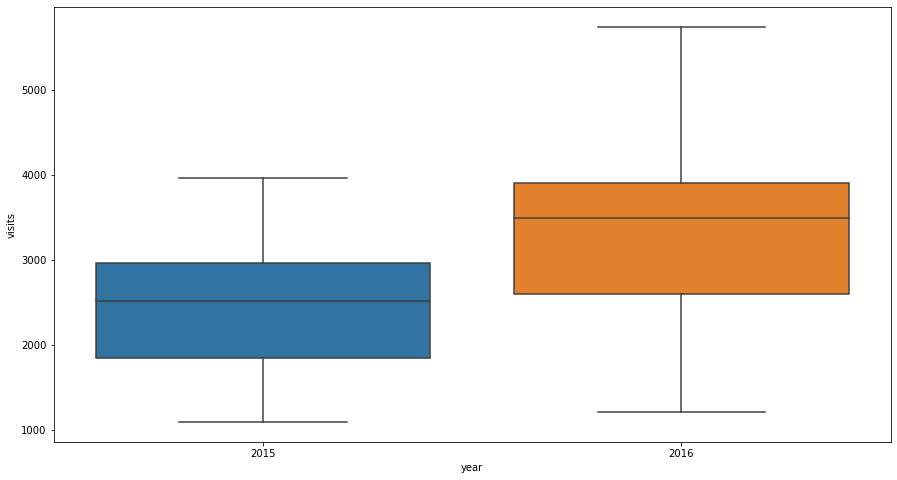

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.boxplot(data=web_traffic_df, x="year", y="visits", showfliers=False, ax=ax)
plt.show()

Considering there's a bit of a trend upwards, the time series is likely non-stationary. We could confirm this with a statistical test. But before that, I'll leave out some of the series so that we could test out our predictive model later on with unseen, unprocessed time series data.

In [78]:
train_df = web_traffic_df.loc["2015":"2016-11"]['visits']
test_df = web_traffic_df.loc["2016-12"]['visits']

In [29]:
# Statistical test for stationality: the Augmented Dicky-Fuller test
# Null hypothesis of Dicky-Fuller is that the time series is non-stationary due to trend
from statsmodels.tsa.stattools import adfuller

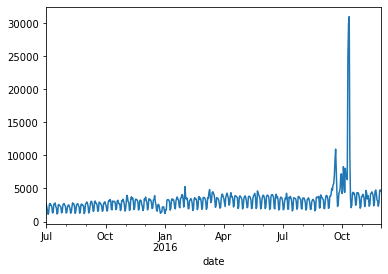

In [30]:
train_df.plot()
plt.show()

In [31]:
# Checking null hypothesis
results = adfuller(train_df)
print("Test statistic: ", results[0]) # The more negative this number is the likely it is stationary
print("p-value: ", results[1])
print("Critical values: ", results[4])

Test statistic:  -2.6278449135028334
p-value:  0.08737775751139443
Critical values:  {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}


p-value is above 0.05, we must reject the null hypothesis. This time series is ***not*** stationary. We could try transforming this through differencing.

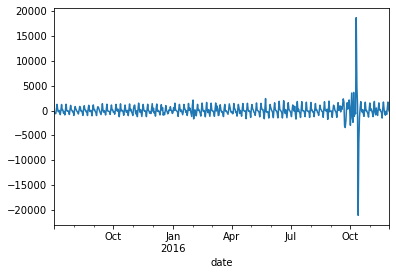

In [32]:
train_df.diff().dropna().plot()
plt.show()

In [33]:
results = adfuller(train_df.diff().dropna())
print("Test statistic: ", results[0]) # The more negative this number is
print("p-value: ", results[1])
print("Critical values: ", results[4])

Test statistic:  -8.102326931859192
p-value:  1.289884078149622e-12
Critical values:  {'1%': -3.4435494520411605, '5%': -2.8673612117611267, '10%': -2.5698704830567247}


Transforming the series does indeed make it stationary, both visually and statistically. However, it does seem like there's a seasonal pattern without our time series. Somethig we might need to deal with.

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
# From the differencing, it looks like there's a cycle of 7 that occurs
decompose_results = seasonal_decompose(train_df.diff().dropna(), period=7)

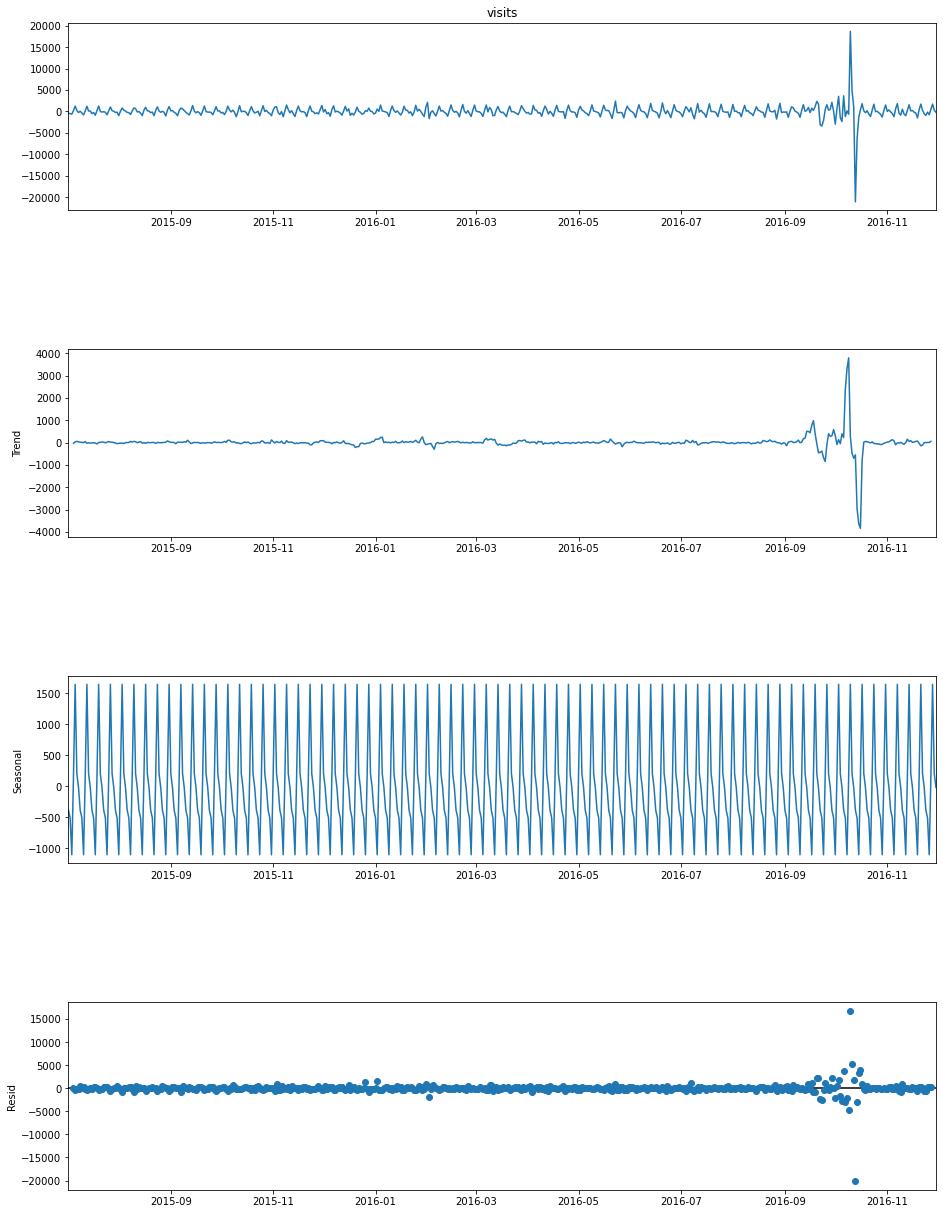

In [37]:
# Plotting results
fig = decompose_results.plot()
fig.set_size_inches((15, 20))
plt.show()

Considering how the trend is essentially flat now without the seasonal period, it's likely we need that seasonal differencing term to separate out our trend and seasonality components.

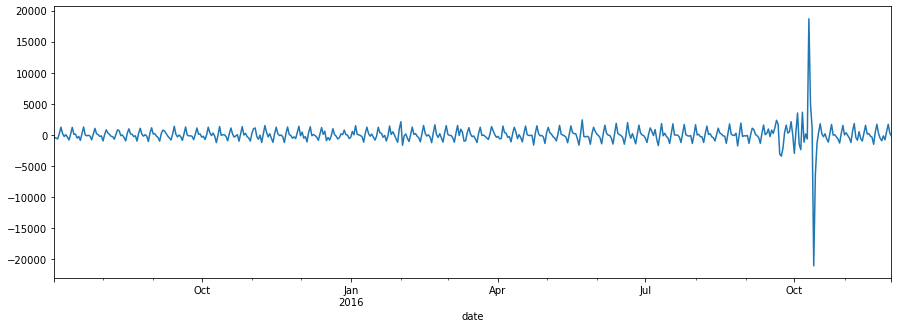

In [38]:
# First differencing without seasonal
train_df.diff().dropna().plot(figsize=(15,5))
plt.show()

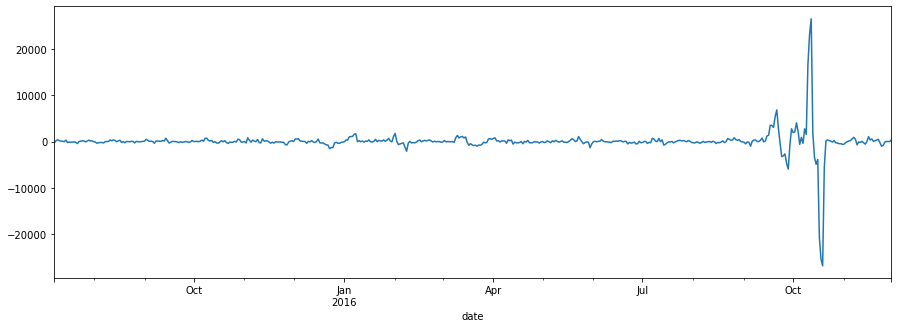

In [39]:
# First seasonal differencing
train_df.diff(7).dropna().plot(figsize=(15,5))
plt.show()

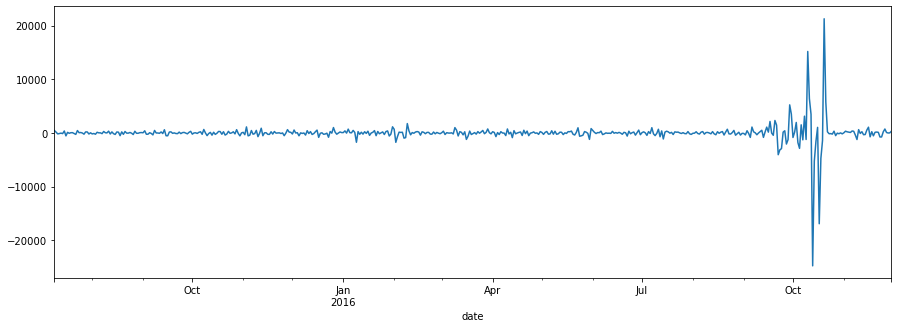

In [40]:
# First differencing + first seasonal differencing
train_df.diff().diff(7).dropna().plot(figsize=(15,5))
plt.show()

In [41]:
import pmdarima as pm

In [42]:
results = pm.auto_arima(train_df,
                        d=1,
                        D=1,
                        start_p=1,
                        start_q=1,
                        start_P=1,
                        start_Q=1,
                        max_p=5,
                        max_q=5,
                        max_P=5,
                        max_Q=5,
                        seasonal=True,
                        m=7,
                        information_criterion="aic",
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        solver='cg')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=2.06 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=9185.967, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=9027.330, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=9173.699, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8926.391, Time=1.05 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=8904.737, Time=1.84 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=8882.334, Time=3.31 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=8869.035, Time=4.27 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=8.16 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=5.72 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=8884.294, Time=1.23 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=8861.191, Time=6.15 sec
 ARIMA(2,1,0)(4,1,0)[7]             : AIC=8873.881, Time=3.60 sec
 ARIMA(2,1,0)(5,1,1)[7]             : AIC=8800.439, T

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  519
Model:             SARIMAX(2, 1, 0)x(5, 1, [1], 7)   Log Likelihood               -4391.219
Date:                             Mon, 18 Apr 2022   AIC                           8800.439
Time:                                     21:50:33   BIC                           8838.566
Sample:                                          0   HQIC                          8815.386
                                             - 519                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2088      0.047      4.478      0.000       0.117       0.300
ar.L2         -0.1494      0.028     -5.411      0.000      -0.204      -0.095
ar.S.L7       -0.1238      0.074     -1.680      0.093      -0.268       0.021
ar.S.L14      -0.1019      0.079     -1.287      0.198      -0.257       0.053
ar.S.L21       0.0287      0.067      0.430      0.667      -0.102       0.160
ar.S.L28      -0.0808      0.130     -0.620      0.535      -0.336       0.175
ar.S.L35      -0.0302      0.105     -0.288      0.773      -0.235       0.175
ma.S.L7       -0.9300      0.054    -17.248      0.000      -1.036      -0.824
sigma2      1.661e+06   1.93e+04     86.251      0.000    1.62e+06     1.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):            672231.66
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              69.20   Skew:                            -2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                       180.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

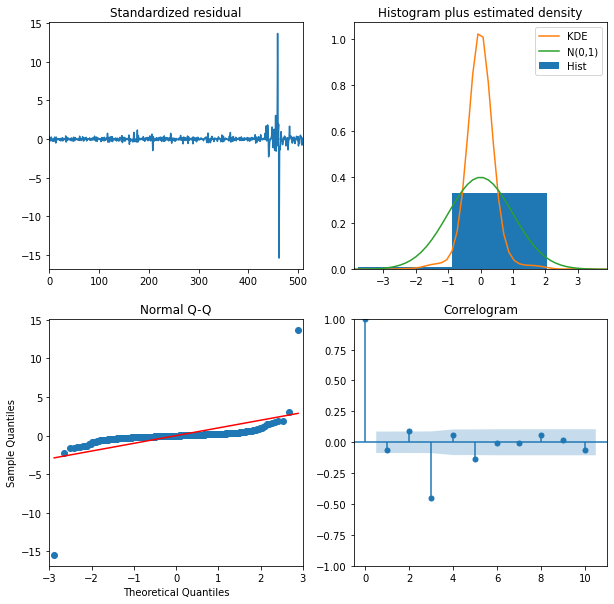

In [44]:
results.plot_diagnostics(figsize=(10,10))
plt.show()

From both the results summary and the plot_diagnostics of the model, it is true that the model residuals are related. However this couldn't be helped considering it is seasonal in nature.

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model = SARIMAX(train_df, order=(2, 1, 0), seasonal_order=(5,1,1,7))

/Users/Lee/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Lee/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.60185D+00    |proj g|=  2.00932D-02

At iterate    5    f=  8.58927D+00    |proj g|=  4.07117D-02

At iterate   10    f=  8.58033D+00    |proj g|=  1.82350D-02

At iterate   15    f=  8.57629D+00    |proj g|=  5.02994D-04

At iterate   20    f=  8.57628D+00    |proj g|=  7.91709D-04

At iterate   25    f=  8.57560D+00    |proj g|=  1.26419D-02

At iterate   30    f=  8.54194D+00    |proj g|=  7.79532D-02

At iterate   35    f=  8.46765D+00    |proj g|=  5.84387D-02

At iterate   40    f=  8.46224D+00    |proj g|=  5.11769D-03

At iterate   45    f=  8.46093D+00    |proj g|=  1.06483D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [48]:
# One step ahead forecast prediction (Testing forecast in sample)
forecast = results.get_prediction(start=-28)

In [49]:
mean_forecast = forecast.predicted_mean

In [50]:
mean_forecast

2016-11-03    1848.867781
2016-11-04    3335.335803
2016-11-05    1947.320284
2016-11-06    2378.658959
2016-11-07    4319.535536
2016-11-08    4917.927697
2016-11-09    4080.509327
2016-11-10    3673.342424
2016-11-11    3607.211055
2016-11-12    1988.627248
2016-11-13    2526.927784
2016-11-14    4898.470405
2016-11-15    4347.836929
2016-11-16    4404.315006
2016-11-17    3826.694771
2016-11-18    3561.954794
2016-11-19    2649.772637
2016-11-20    2390.049553
2016-11-21    5665.983059
2016-11-22    4743.635832
2016-11-23    4957.887762
2016-11-24    2864.909288
2016-11-25    2471.902772
2016-11-26    1991.448411
2016-11-27    2471.445131
2016-11-28    5550.761091
2016-11-29    4667.217816
2016-11-30    4877.367466
Freq: D, Name: predicted_mean, dtype: float64

In [51]:
confidence_interval = forecast.conf_int()

In [52]:
confidence_interval.head()

,lower visits,upper visits
2016-11-03,-677.477915,4375.213476
2016-11-04,808.990130,5861.681475
2016-11-05,-579.025378,4473.665946
2016-11-06,-147.686701,4905.004619
2016-11-07,1793.189882,6845.881191


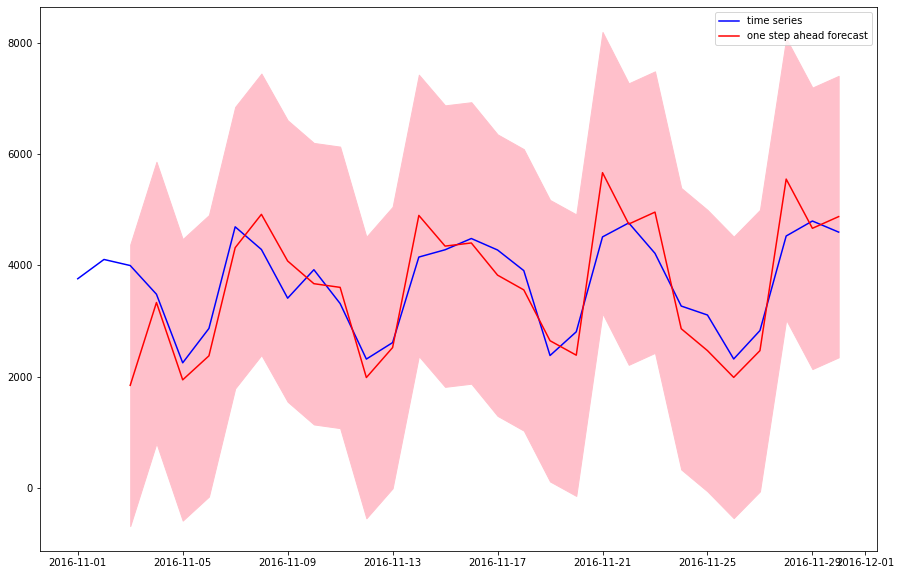

In [53]:
plt.figure(figsize=(15,10))

# Plot forecast
plt.plot(train_df["2016-11"], color='blue', label='time series')
plt.plot(mean_forecast, color='red', label='one step ahead forecast')

# Plot uncertainty
plt.fill_between(confidence_interval.index, y1=confidence_interval.iloc[:,0], 
                 y2=confidence_interval.iloc[:,1], color='pink')

plt.legend()
plt.show()

In [54]:
# Dynamic forecast prediction (Testing forecast in sample)
forecast = results.get_prediction(start=-28, dynamic=True)

In [55]:
forecast.predicted_mean

2016-11-03    1848.867781
2016-11-04     736.250550
2016-11-05    -603.895475
2016-11-06    -411.718001
2016-11-07     965.424338
2016-11-08    1159.532650
2016-11-09    1145.333889
2016-11-10    1610.929600
2016-11-11    1164.160467
2016-11-12    -107.542261
2016-11-13      44.488120
2016-11-14    2358.073999
2016-11-15    2705.088257
2016-11-16    2720.280895
2016-11-17    2059.472738
2016-11-18    1264.537501
2016-11-19      11.080321
2016-11-20     154.321177
2016-11-21    2880.120386
2016-11-22    3347.098974
2016-11-23    3420.656675
2016-11-24    1964.436287
2016-11-25     960.525299
2016-11-26    -297.506617
2016-11-27    -147.954071
2016-11-28    2444.592131
2016-11-29    2890.825664
2016-11-30    2907.270396
Freq: D, Name: predicted_mean, dtype: float64

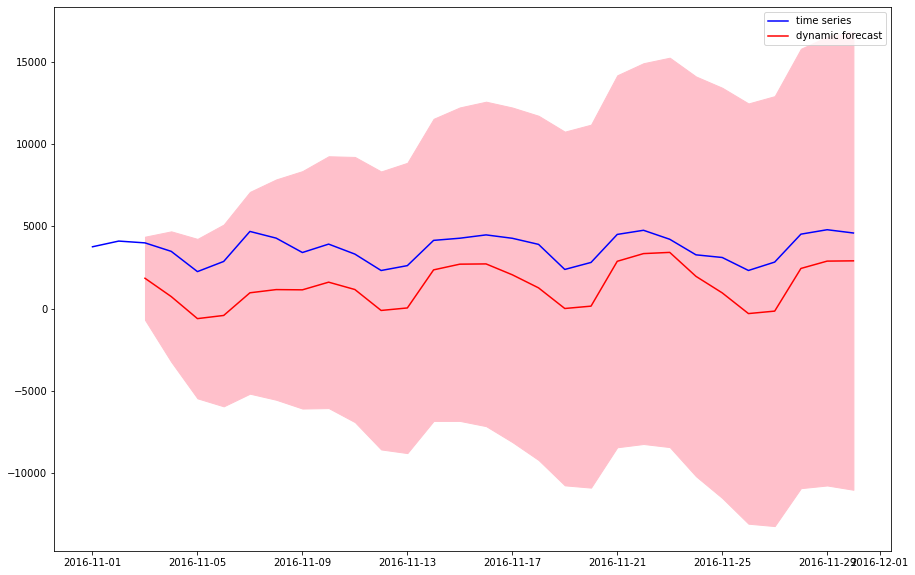

In [56]:
plt.figure(figsize=(15,10))

# Plot forecast
plt.plot(train_df["2016-11"], color='blue', label='time series')
plt.plot(forecast.predicted_mean, color='red', label='dynamic forecast')

# Plot uncertainty
plt.fill_between(forecast.conf_int().index, y1=forecast.conf_int().iloc[:,0], 
                 y2=forecast.conf_int().iloc[:,1], color='pink')

plt.legend()
plt.show()

In [57]:
# Testing forecast ahead of sample
forecast = results.get_forecast(steps=31)

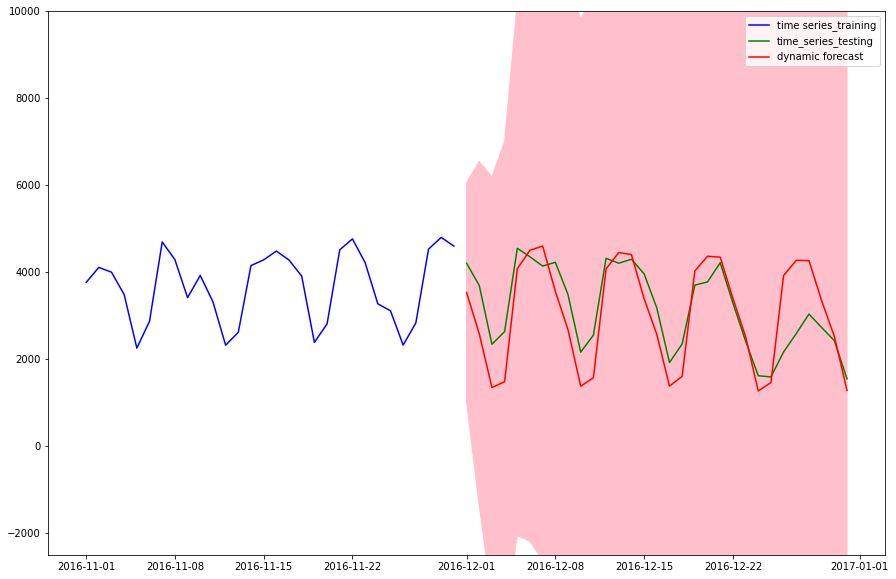

In [58]:
plt.figure(figsize=(15,10))

# Plot forecast
plt.plot(train_df["2016-11"], color='blue', label='time series_training')
plt.plot(test_df, color='green', label='time_series_testing')
plt.plot(forecast.predicted_mean, color='red', label='dynamic forecast')

# Plot uncertainty
plt.fill_between(forecast.conf_int().index, y1=forecast.conf_int().iloc[:,0], 
                 y2=forecast.conf_int().iloc[:,1], color='pink')

plt.ylim([-2500, 10000])
plt.legend()
plt.show()

In [59]:
residuals = results.resid

In [60]:
residuals

date
2015-07-01    2687.000000
2015-07-02    -740.508247
2015-07-03    -203.008782
2015-07-04    -590.950189
2015-07-05     187.044605
                 ...     
2016-11-26     330.551589
2016-11-27     360.554869
2016-11-28   -1021.761091
2016-11-29     130.782184
2016-11-30    -278.367466
Length: 519, dtype: float64

In [61]:
mae = np.mean(np.abs(residuals))
print(mae)

394.8859302317362


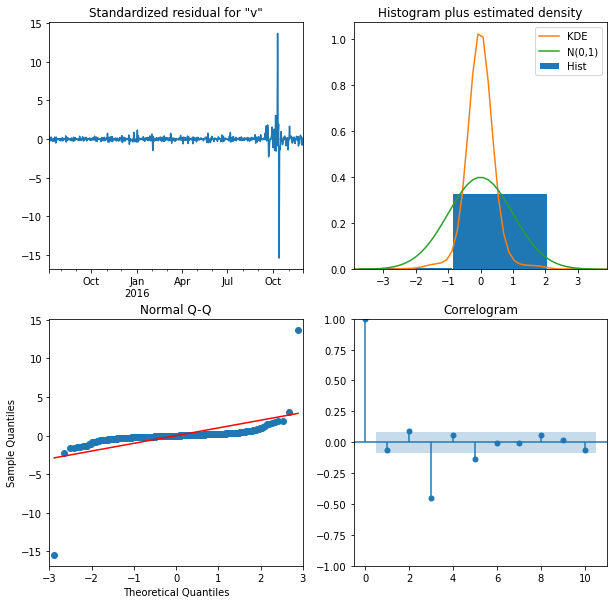

In [62]:
results.plot_diagnostics(figsize=(10,10))
plt.show()

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              visits   No. Observations:                  519
Model:             SARIMAX(2, 1, 0)x(5, 1, [1], 7)   Log Likelihood               -4391.219
Date:                             Mon, 18 Apr 2022   AIC                           8800.439
Time:                                     21:50:47   BIC                           8838.566
Sample:                                 07-01-2015   HQIC                          8815.386
                                      - 11-30-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2088      0.047      4.478      0.000       0.117       0.300
ar.L2         -0.1494      0.028     -5.411      0.000      -0.204      -0.095
ar.S.L7       -0.1238      0.074     -1.680      0.093      -0.268       0.021
ar.S.L14      -0.1019      0.079     -1.287      0.198      -0.257       0.053
ar.S.L21       0.0287      0.067      0.430      0.667      -0.102       0.160
ar.S.L28      -0.0808      0.130     -0.620      0.535      -0.336       0.175
ar.S.L35      -0.0302      0.105     -0.288      0.773      -0.235       0.175
ma.S.L7       -0.9300      0.054    -17.248      0.000      -1.036      -0.824
sigma2      1.661e+06   1.93e+04     86.251      0.000    1.62e+06     1.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):            672231.66
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              69.20   Skew:                            -2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                       180.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
mae_forecast = np.mean(np.abs(forecast.predicted_mean - test_df))
print(mae_forecast)

603.0969436846508


In [79]:
test_df.std()

960.3945884850654

In [80]:
test_df_standard_deviation = test_df.std()

In [83]:
test_df = test_df.reset_index()

In [85]:
test_df['lower'] = test_df['visits'] - test_df_standard_deviation
test_df['upper'] = test_df['visits'] + test_df_standard_deviation

In [84]:
test_df = test_df.set_index('date')

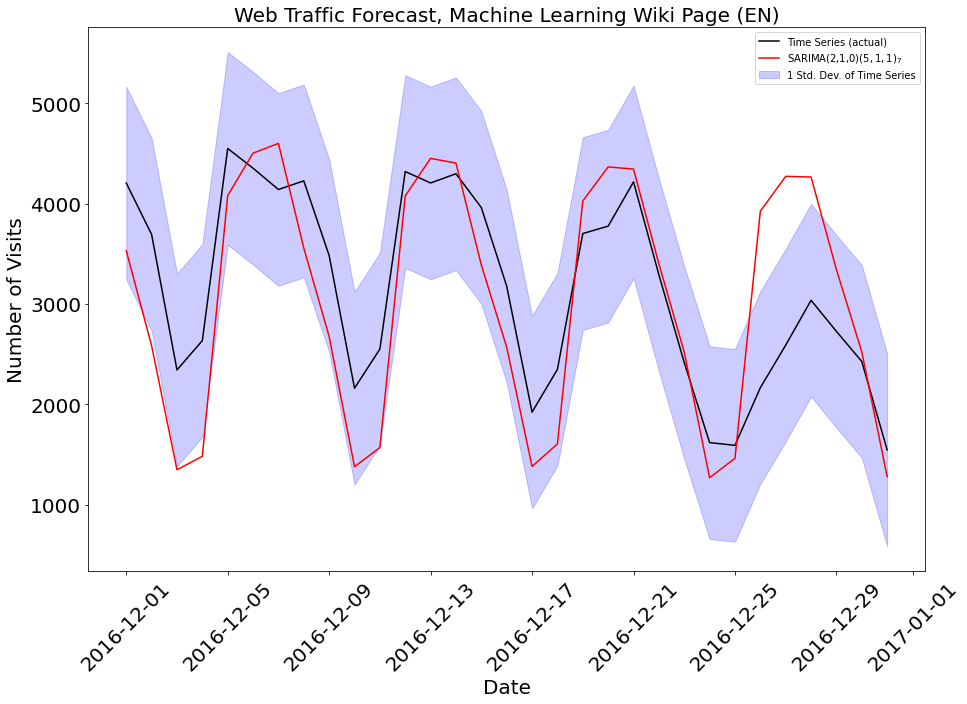

In [110]:
plt.figure(figsize=(15,10))

# Plot forecast and time series
plt.plot(test_df['visits'], color='black', label='Time Series (actual)')
plt.plot(forecast.predicted_mean, color='red', label='SARIMA(2,1,0)$(5,1,1)_{7}$')

# Plot 1 standard deviation
plt.fill_between(test_df.index, y1=test_df['lower'], y2=test_df['upper'], 
                 color='blue', alpha=0.2, label='1 Std. Dev. of Time Series')

plt.legend()
plt.title('Web Traffic Forecast, Machine Learning Wiki Page (EN)', fontsize=20)
plt.ylabel('Number of Visits', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.savefig(os.path.join(images_dir,'time_series_modeling.png'))
plt.show()